In [1]:
import pandas as pd
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import pickle

In [ ]:
# get the spacy and the news api 
!pip install spacy
!pip install newsapi-python

# install spacy's english language model
!python -m spacy download en_core_web_lg

In [3]:
import en_core_web_lg
from newsapi import NewsApiClient

nlp_eng = en_core_web_lg.load()
newsapi = NewsApiClient (api_key='1514204bb731484bbf1eb79e1ddd20bf')

In [4]:
# /v2/top-headlines
top_headlines = newsapi.get_top_headlines(q='bitcoin',
                                          category='business',
                                          language='en',
                                          country='us')

In [13]:
filename = 'articles.pckl'
pickle.dump(top_headlines, open(filename, 'wb'))

filename = 'articles.pckl'
loaded_model = pickle.load(open(filename, 'rb'))

filepath = 'articles.pckl'
pickle.dump(loaded_model, open(filepath, 'wb'))

In [6]:
print(top_headlines)

{'status': 'ok', 'totalResults': 1, 'articles': [{'source': {'id': None, 'name': 'Cointelegraph'}, 'author': 'David Attlee', 'title': '‘US government does not stand for freedom’: Bukele reacts to US bill passing Senate committee - Cointelegraph', 'description': 'The bill would direct federal agencies to scrutinize how El Salvador implements its Bitcoin law.', 'url': 'https://cointelegraph.com/news/us-government-does-not-stand-for-freedom-bukele-reacts-to-us-bill-passing-senate-committee', 'urlToImage': 'https://images.cointelegraph.com/images/1200_aHR0cHM6Ly9zMy5jb2ludGVsZWdyYXBoLmNvbS91cGxvYWRzLzIwMjEtMDgvNTQyZDUwYzctZDk4OC00NTY5LWFmYzctM2NjNWUzZGRlZmI4LmpwZw==.jpg', 'publishedAt': '2022-03-24T15:18:48Z', 'content': 'El Salvador president Nayib Bukele reacted to the news that the recently proposed Accountability for Cryptocurrency in El Salvador Act (ACES) had passed the U.S. Senate Foreign Relations Committee an… [+1519 chars]'}]}


In [16]:
dados = []

for i, article in enumerate(top_headlines['articles']):
  title = article['title']
  description = article['description']
  content = article['content']
  date = article['publishedAt']
  dados.append({'title':title, 'date':date, 
                'desc':description, 'content':content})

df = pd.DataFrame(dados)
df = df.dropna()
df.head()
df.to_csv('data.csv')

In [8]:
# for tokenizing the articles
from nltk.tokenize import sent_tokenize, word_tokenize
import string
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
def get_keywords_eng(text):
  result = []
  tokenized = word_tokenize(text)
  print(tokenized)

  for token in tokenized:
    if (token in nlp_eng.Defaults.stop_words or token in string.punctuation):
      continue

  return result

In [10]:
from collections import Counter
results = []

for content in df.content.values:
    results.append([('#' + x[0]) for x in Counter(get_keywords_eng(content)).most_common(5)])

df['keywords'] = results

['El', 'Salvador', 'president', 'Nayib', 'Bukele', 'reacted', 'to', 'the', 'news', 'that', 'the', 'recently', 'proposed', 'Accountability', 'for', 'Cryptocurrency', 'in', 'El', 'Salvador', 'Act', '(', 'ACES', ')', 'had', 'passed', 'the', 'U.S.', 'Senate', 'Foreign', 'Relations', 'Committee', 'an…', '[', '+1519', 'chars', ']']


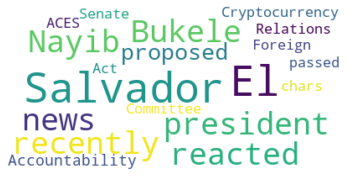

In [11]:
text = str(content)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()